# Daniel Green 1027606
## Chapter 6 

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

fb = pd.read_csv('./ch_06/data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('./ch_06/data/earthquakes.csv')
covid = pd.read_csv('./ch_06/data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

## Chapter 6 Exercise 1
Using `seaborn`, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the `mb` magnitude type.

Text(0.5, 1.01, 'Correlation between earthquake magnitude\nand whether there was a tsunami')

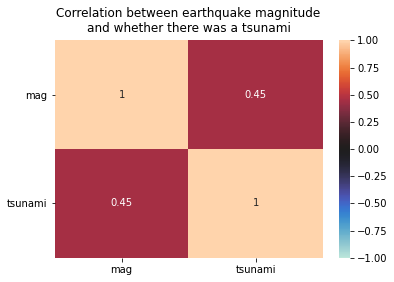

In [10]:
sns.heatmap(
    quakes.query('magType == "mb"')[['mag','tsunami']].corr(), 
    annot=True, center=0, vmin=-1, vmax=1
)
plt.yticks(rotation=0)
plt.title('Correlation between earthquake magnitude\nand whether there was a tsunami', y=1.01)

## Chapter 6 Exercise 2
Create a box plot of Facebook volume traded and closing price and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. 

Text(0.5, 1.1, 'Facebook volume traded and closing price with Tukey Fence bounds')

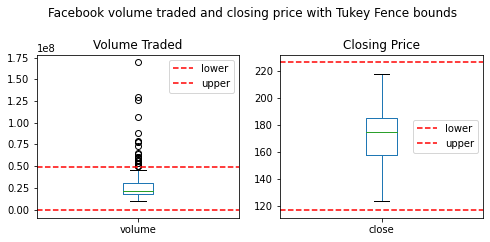

In [11]:
cols = ['volume', 'close']
subset = fb[cols]

quantiles = subset.quantile([0.25, 0.75])
quantiles.loc['iqr',:] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:]

axes = subset.plot(kind='box', subplots=True, figsize=(8, 3), title=['Volume Traded', 'Closing Price'])
for ax, col in zip(axes, cols):
    stats = quantiles[col]
    lower = stats.loc[0.25] - 1.5 * stats['iqr']
    upper = stats.loc[0.75] + 1.5 * stats['iqr']
    for bound, name in zip([lower, upper], ['lower', 'upper']):
        ax.axhline(
            bound, 
            color='red', 
            linestyle='dashed',
            label=name
        )
        ax.legend()
plt.suptitle('Facebook volume traded and closing price with Tukey Fence bounds', y=1.1)

## Chapter 6 Exercise 3
Plot the evolution of cumulative COVID-19 cases worldwide and add a dashed vertical line for on the date that it surpassed 1 million.

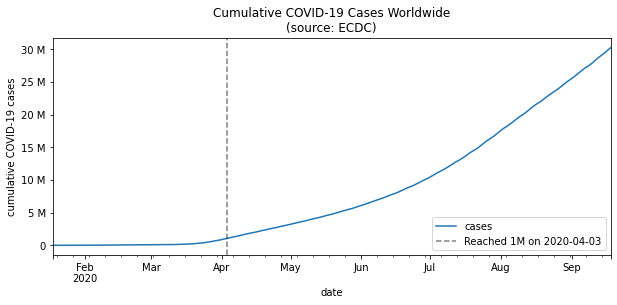

In [12]:
from matplotlib.ticker import EngFormatter

cumulative_cases = covid.groupby(pd.Grouper(freq='1D')).sum().cases.cumsum()

ax = cumulative_cases.plot(title='Cumulative COVID-19 Cases Worldwide\n(source: ECDC)', figsize=(10, 4))
ax.set_ylabel('cumulative COVID-19 cases')
ax.yaxis.set_major_formatter(EngFormatter())

over_1M = cumulative_cases[cumulative_cases >= 1e6].index[0]
ax.axvline(over_1M, linestyle='dashed', color='k', alpha=0.5, label=f"Reached 1M on {over_1M.strftime('%Y-%m-%d')}")

ax.legend()

## Chapter 6 Exercise 4
Use `axvspan()` to shade a rectangle from '2018-07-25' to '2018-07-31' marking the large decline in Facebook price on a line plot of closing price.

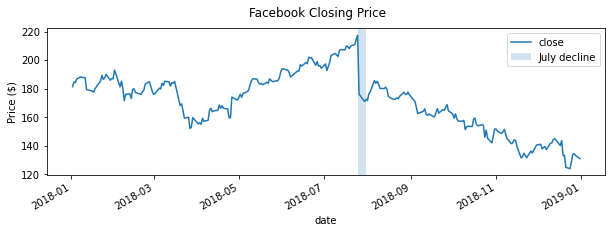

In [13]:
fb.close.plot(kind='line', figsize=(10, 3))
plt.axvspan(
    '2018-07-25', '2018-07-31', alpha=0.2, label='July decline',
)
plt.ylabel('Price ($)')
plt.suptitle('Facebook Closing Price')
plt.legend()

## Chapter 6 Exercise 5
Using the Facebook stock data, annotate the following three events on a line graph of closing price:
1. 'Disappointing user growth announced after close' on July 25, 2018
2. 'Cambridge Analytica story breaks' on March 19, 2018 (when it affected the market)
3. 'FTC launches investigation' on March 20, 2018

Text(0.5, 0.98, 'Facebook Closing Price')

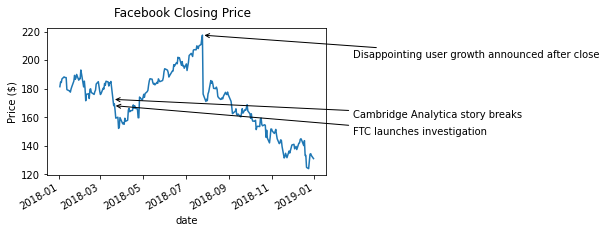

In [14]:
fb.close.plot(kind='line', figsize=(5, 3))

notes = [
    ('Disappointing user growth announced after close', '2018-07-25'),
    ('Cambridge Analytica story breaks', '2018-03-19'),
    ('FTC launches investigation', '2018-03-20')
]

# for repeatable random jitter
np.random.seed(1)

for text, date in notes:
    y_value = fb.close[date]
    jitter = np.random.uniform(-20, -10, 1)
    plt.annotate(
        text, 
        xy=(date, y_value),
        xytext=('2019-02-25', y_value + jitter),
        arrowprops=dict(arrowstyle='->')
    )
plt.ylabel('Price ($)')
plt.suptitle('Facebook Closing Price')

## Chapter 6 Exercise 6
Modify the `reg_resid_plot()` function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, you should pick a qualitative colormap or make your own.

In [15]:
import itertools

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


def reg_resid_plots(data):
    """
    Using `seaborn`, plot the regression and residuals
    plots side-by-side for every permutation of 2 columns 
    in the data.

    Parameters:
        - data: A `pandas.DataFrame` object

    Returns:
        A matplotlib `Axes` object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(
        permutation_count, 
        2, 
        figsize=(15, 4 * permutation_count)
    )

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2), 
        ax,
        [cm.Dark2(i) for i in range(len(ax))]
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)
            
            if func == sns.residplot:
                # mark the residuals as such
                subplot.set_ylabel('residuals')

    return fig.axes

Test it out:

[<AxesSubplot:xlabel='close', ylabel='volume'>,
 <AxesSubplot:xlabel='close', ylabel='residuals'>,
 <AxesSubplot:xlabel='volume', ylabel='close'>,
 <AxesSubplot:xlabel='volume', ylabel='residuals'>]

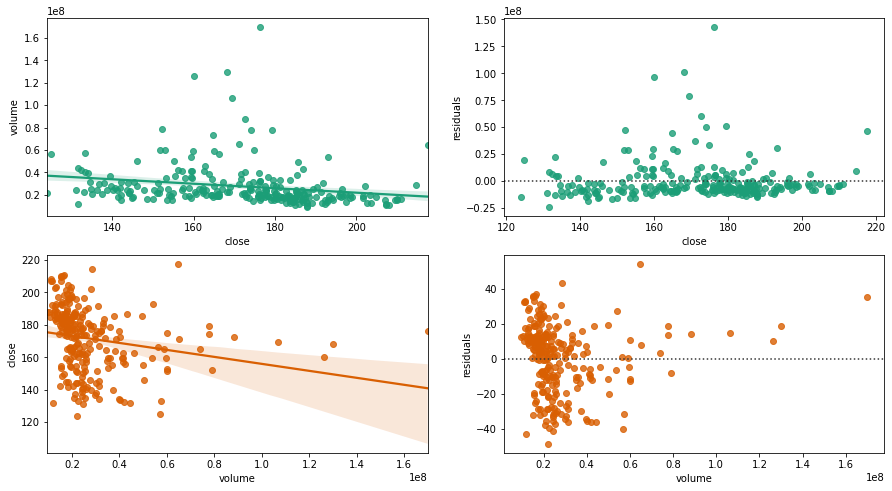

In [16]:
reg_resid_plots(fb[['close', 'volume']])